# Análisis dataset gob.bo

Analizando Datos de trámites del portal único de trámites de Bolivia. Datos obtenidos por web scraping.

In [84]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/gobbo_tramites_pre.csv', encoding='utf-8', sep="," )
df

,titulo,institucion,descripcion,contacto,web,es_presencial,es_en_linea,requisitos,procedimiento,num_ubicaciones,...,costo_formas,costo_conceptos,costo_ctas_bancarias,calificacion,url,categoria,duracion,marco_legal,costo_bancos,horarios_atencion
0,DECLARACIONES JURADAS - SIAT EN LÍNEA,Servicio de Impuestos Nacionales - SIN,Facilitar al contribuyente el cumplimiento de ...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nContar con las credenciales de acc...,PROCEDIMIENTO\nIngresar al siguiente enlace: h...,0,...,NaN,NaN,NaN,4,https://www.gob.bo/tramite/851,Impuestos,NaN,NaN,NaN,NaN
1,INSCRIPCIÓN AL RÉGIMEN DE REINTEGRO EN EFECTIV...,Servicio de Impuestos Nacionales - SIN,"El Régimen de Reintegro del IVA (Re-IVA), alca...",informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nCedula de Identidad vigente.\nN° d...,PROCEDIMIENTO\nIngresar al siguiente enlace pa...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2652,Impuestos,NaN,Ley 1355,NaN,NaN
2,REGISTRO AL PADRÓN NACIONAL DE CONTRIBUYENTES,Servicio de Impuestos Nacionales - SIN,Las Personas Naturales y Jurídicas que efectúe...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS INSCRIPCIÓN A TRAVÉS DEL SIAT EN LÍ...,PROCEDIMIENTO DE INSCRIPCIÓN\nIngresar al sigu...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/1367,Impuestos,NaN,NaN,NaN,NaN
3,INACTIVACIÓN DEL NIT,Servicio de Impuestos Nacionales - SIN,Procedimiento para inactivar el NIT,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nContar con las credenciales de acc...,PRODECIMIENTO\nIngresar al siguiente enlace ht...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2650,Impuestos,NaN,RND 10-0009-11,NaN,NaN
4,VERIFICADOR DE FACTURAS,Servicio de Impuestos Nacionales - SIN,Herramienta habilitada para verificar si las f...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITO\nContar la factura original.,PROCEDIMIENTO\nIngresar al siguiente enlace ht...,0,...,NaN,NaN,NaN,4,https://www.gob.bo/tramite/2654,Impuestos,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,PERMISO ESPECIAL DE CIRCULACION POR EXCESO DE ...,Administradora Boliviana de Carreteras - ABC,Obtencion de permiso especial para transitar c...,wgutierrez@abc.gob.bo,www.abc.gob.bo,1,0,llenado de formulario\npoliza de buena ejecuci...,NaN,1,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/291,Transporte,NaN,"Decreto Supremo Nº 25629, 24 de diciembre de 1999",NaN,08:00 - 18:00
1778,PERMISO DE CIURCULACION POR EXCESO DE DIMENSIONES,Administradora Boliviana de Carreteras - ABC,Obtencion de permiso para circular con exceso ...,wgutierrez@abc.gob.bo,www.abc.gob.bo,1,0,Nota Dirigida al Gerente Regional (Mencionando...,Presentar todos los requisitos en ventanilla ú...,9,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/296,Transporte,3 dias,"Decreto Supremo Nº 25629, 24 de diciembre de 1999",NaN,"08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:0..."
1779,USO DE BALANZA,Zona Franca Comercial e Industrial de Cobija -...,Brindar el servicio de pesaje a todos los tran...,MAEZOFRACOBIJA@GMAIL.COM,https://www.zofracobija.gob.bo/,1,0,Presentarse físicamente con el transporte en i...,Presentarse físicamente con el transporte en i...,0,...,Forma de pago: EFECTIVO,Concepto de pago: uso de balanza,-,0,https://www.gob.bo/tramite/2136,Transporte,20 minutos,R.A. Nº 20/2017,Banco Unión,NaN
1780,CERTIFICACIÓN DE NO SUSTANCIAS AGOTADORAS DE O...,Ministerio de Medio Ambiente y Agua - MINMAA,Otorgar la Certificación de No Sustancias Agot...,quinochavez@hotmail.com,www.mmaya.gob.bo,1,0,"Carta de Solicitud de Certificación de No SAO,...",El solicitante se apersona a oficinas de la Co...,0,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/1515,Transporte,10 dias,Compendio de normativas de gestión ambiental d...,NaN,NaN


In [85]:
# temas 
import plotly.io as pio
import plotly.express as px
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [88]:
# Eliminando duplicados
df = df.drop_duplicates(subset=['titulo'], keep='last')
df = df.drop_duplicates(subset=['url'], keep='last')
df.shape

(1268, 26)

## Tŕamites por institución

In [89]:
df['institucion'].unique()

array(['Servicio de Impuestos Nacionales - SIN',
       'Autoridad de Impugnación Tributaria - AIT',
       'Gobierno Autónomo Departamental de Cochabamba - GADC',
       'Empresa Pùblica Departamental de Servicios Eléctricos Tarija SETAR - SETAR',
       'Consejo de la Magistratura - CM',
       'Agencia Estatal de Vivienda - AEVIVIENDA',
       'Tribunal Departamental de Justicia de Santa Cruz - TDJ-SCZ',
       'Ministerio de Obras Públicas, Servicios y Vivienda - MINOPSV',
       'Consejo Nacional de Vivienda Policial - COVIPOL',
       'Centro de Comunicaciones La Paz - CCLP',
       'Ministerio de Culturas y Turismo - MINCULT',
       'Autoridad de Desarrollo del Cine y Audiovisuales - ADECINE',
       'Ministerio de Trabajo, Empleo y Previsión Social - MTEPS',
       'Servicio Nacional de Propiedad Intelectual - SENAPI',
       'Pro – Bolivia - PRO-BOL',
       'Ministerio de Desarrollo Productivo y Economía Plural - MDPyEP',
       'Servicio de Desarrollo de las Empresas Públic

Parece que muchos nombres de instituciones son distintos pero se refieren a la misma institución, por ejemplo:
- Ministerio de Educación de Bolivia - MINEDU
- MINISTERIO DE EDUCACIÓN - MINEDU

Se va a mantener solamente un nombre.

In [90]:
nombres_mapa = {
    'Ministerio de Educación de Bolivia - MINEDU': 'MINISTERIO DE EDUCACIÓN - MINEDU',
    'Ministerio\xa0de\xa0Desarrollo\xa0Rural\xa0y\xa0Tierras - MDRyT': 'Ministerio de Desarrollo Rural y Tierras - MDRyT',
    'Fondo Nacional de Solidaridad y Equidad - FNSE - FNSE': 'Fondo Nacional de Solidaridad y Equidad - FNSE'
}


def get_value_using_map(value, value_map):
    if value_map.get(value, None) is not None:
        return value_map[value]
    return value
        

df['institucion'] = df['institucion'].apply(lambda x: get_value_using_map(x, nombres_mapa))
df['institucion'].unique()

array(['Servicio de Impuestos Nacionales - SIN',
       'Autoridad de Impugnación Tributaria - AIT',
       'Gobierno Autónomo Departamental de Cochabamba - GADC',
       'Empresa Pùblica Departamental de Servicios Eléctricos Tarija SETAR - SETAR',
       'Consejo de la Magistratura - CM',
       'Agencia Estatal de Vivienda - AEVIVIENDA',
       'Tribunal Departamental de Justicia de Santa Cruz - TDJ-SCZ',
       'Ministerio de Obras Públicas, Servicios y Vivienda - MINOPSV',
       'Consejo Nacional de Vivienda Policial - COVIPOL',
       'Centro de Comunicaciones La Paz - CCLP',
       'Ministerio de Culturas y Turismo - MINCULT',
       'Autoridad de Desarrollo del Cine y Audiovisuales - ADECINE',
       'Ministerio de Trabajo, Empleo y Previsión Social - MTEPS',
       'Servicio Nacional de Propiedad Intelectual - SENAPI',
       'Pro – Bolivia - PRO-BOL',
       'Ministerio de Desarrollo Productivo y Economía Plural - MDPyEP',
       'Servicio de Desarrollo de las Empresas Públic

In [91]:
df.groupby('institucion').count()['titulo'].sort_values(ascending=False)

institucion
MINISTERIO DE EDUCACIÓN - MINEDU                                               165
Gobierno Autonomo Municipal de Trinidad - GAMT                                  71
Gobierno Autónomo Departamental de Cochabamba - GADC                            66
Servicio Nacional de Propiedad Intelectual - SENAPI                             65
Servicio Plurinacional de Registro de Comercio - SEPREC                         58
                                                                              ... 
Autoridad de Fiscalización y Control de Pensiones y Seguros - APS                1
Transportes Aéreos Bolivianos - TAB                                              1
Autoridad de Fiscalización y Control del Sistema Nacional de Salud - ASINSA      1
Unidad de Proyectos Especiales - UPRE                                            1
Universidad Autónoma Gabriel René Moreno - UAGRM                                 1
Name: titulo, Length: 123, dtype: int64

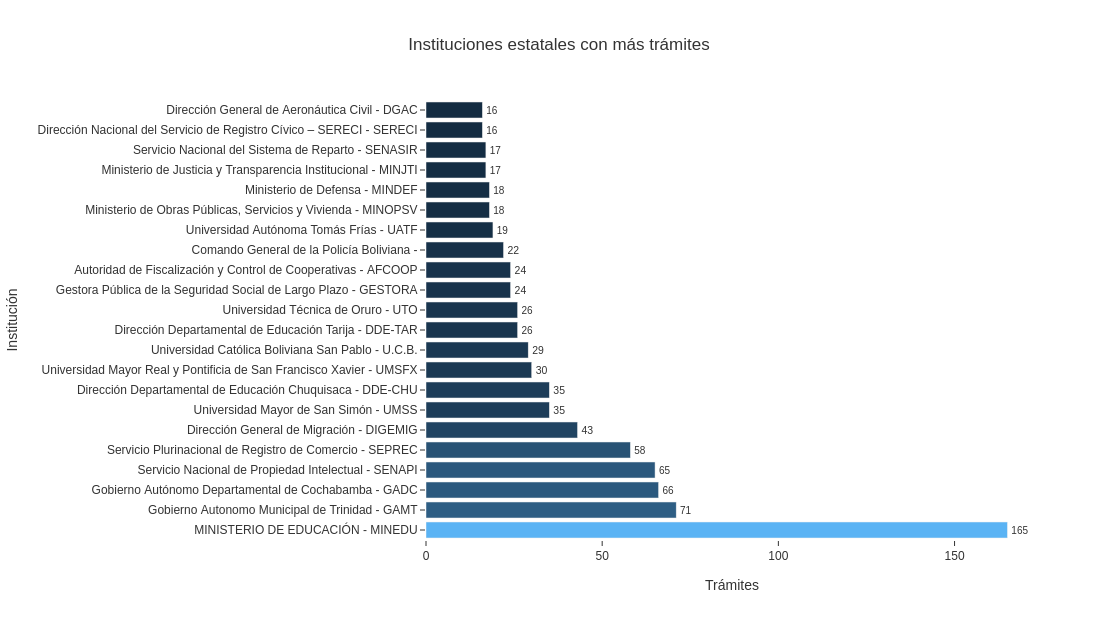

In [92]:
serie = df.groupby('institucion').count()['titulo'].sort_values(ascending=False)
n_samples = int(len(serie)*0.18)


# fig = px.bar(x=serie[:n_samples].index, y=serie[:n_samples].values,  color=serie[:n_samples].values,
#              text_auto=True,
#              title='Instituciones estatales con más trámites')

fig = px.bar(y=serie[:n_samples].index, x=serie[:n_samples].values,  color=serie[:n_samples].values,
             orientation='h',
             text_auto=True,
                 height=620,
             template='ggplot2',
             title='Instituciones estatales con más trámites')

fig.update_traces(showlegend=False)
fig.update_layout(coloraxis_showscale=False, )
fig.update_layout(
    yaxis_title="Institución", xaxis_title="Trámites",
)
fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)'
)

#fig.update_yaxes(visible=False)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


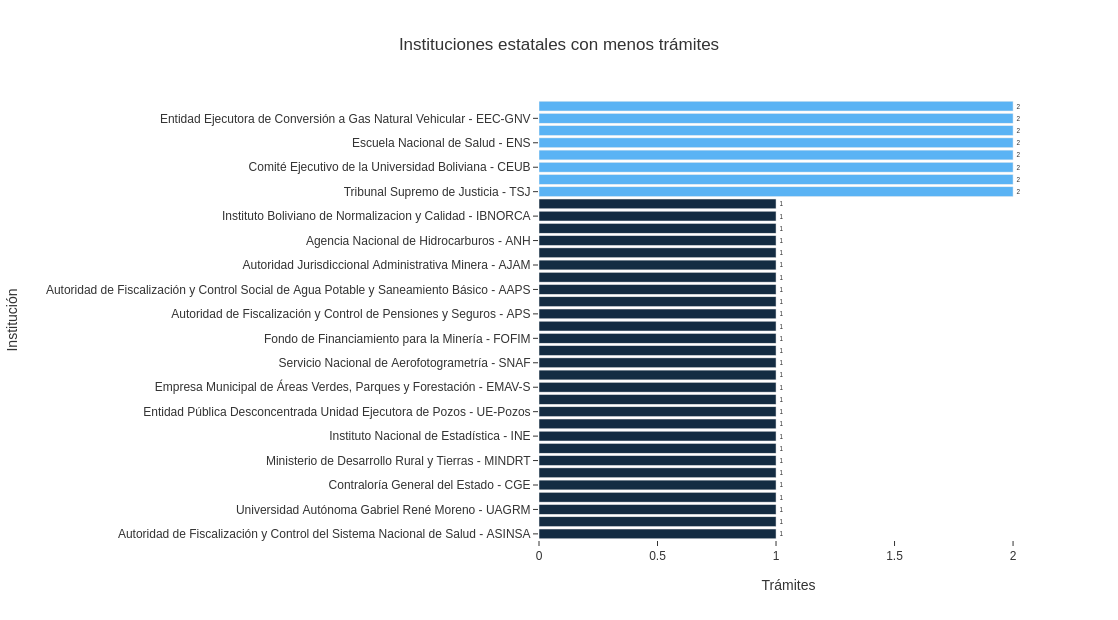

In [93]:
serie = df.groupby('institucion').count()['titulo'].sort_values(ascending=True)
n_samples = int(len(serie)*0.3)

fig = px.bar(y=serie[:n_samples].index, x=serie[:n_samples].values,  color=serie[:n_samples].values,
             orientation='h',
             text_auto=True,
                 height=620,
             template='ggplot2',
             title='Instituciones estatales con menos trámites')

fig.update_traces(showlegend=False)
fig.update_layout(coloraxis_showscale=False, )
fig.update_layout(
    yaxis_title="Institución", xaxis_title="Trámites",
)
fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)'
)

#fig.update_yaxes(visible=False)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


In [94]:
df[df['institucion']=='Agencia de Gobierno Electrónico y Tecnologías de la Información y Comunicación - AGETIC']

,titulo,institucion,descripcion,contacto,web,es_presencial,es_en_linea,requisitos,procedimiento,num_ubicaciones,...,costo_formas,costo_conceptos,costo_ctas_bancarias,calificacion,url,categoria,duracion,marco_legal,costo_bancos,horarios_atencion
1321,REGISTRO DE CIUDADANÍA DIGITAL.,Agencia de Gobierno Electrónico y Tecnologías ...,Brindar Identidad Digital a todos los Bolivian...,contacto@agetic.gob.bo,https://www.agetic.gob.bo,1,1,Cédula de Identidad se encuentra vigente. Para...,Antes de iniciar tu pre-registro asegurate de ...,1,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2617,Identificación,10 minutos,"Ley N° 1080, de Ciudadanía Digital y Lineamien...",NaN,"08:30 - 12:30,14:30 - 18:30"
